In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel("Online Retail_new.xlsx", sheet_name='Online Retail')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
 df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
df.duplicated().sum()

5268

In [10]:
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])

In [11]:
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

In [12]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [13]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df_cleaned.shape

(397884, 9)

###  Top 10 Products by Quantity Sold

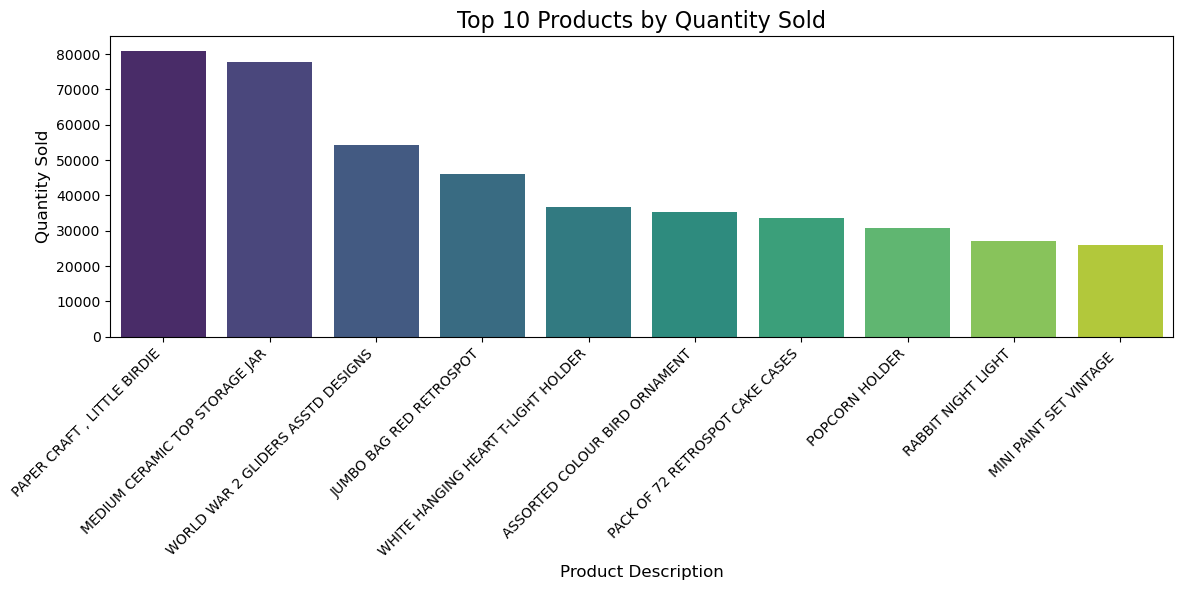

In [18]:
top_products_df = top_products.reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_products_df, x='Description', y='Quantity', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products by Quantity Sold", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.tight_layout()
plt.show()


## Daily Sales Trend

In [19]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDay'] = df_cleaned['InvoiceDate'].dt.date
daily_sales = df_cleaned.groupby('InvoiceDay')['TotalPrice'].sum()


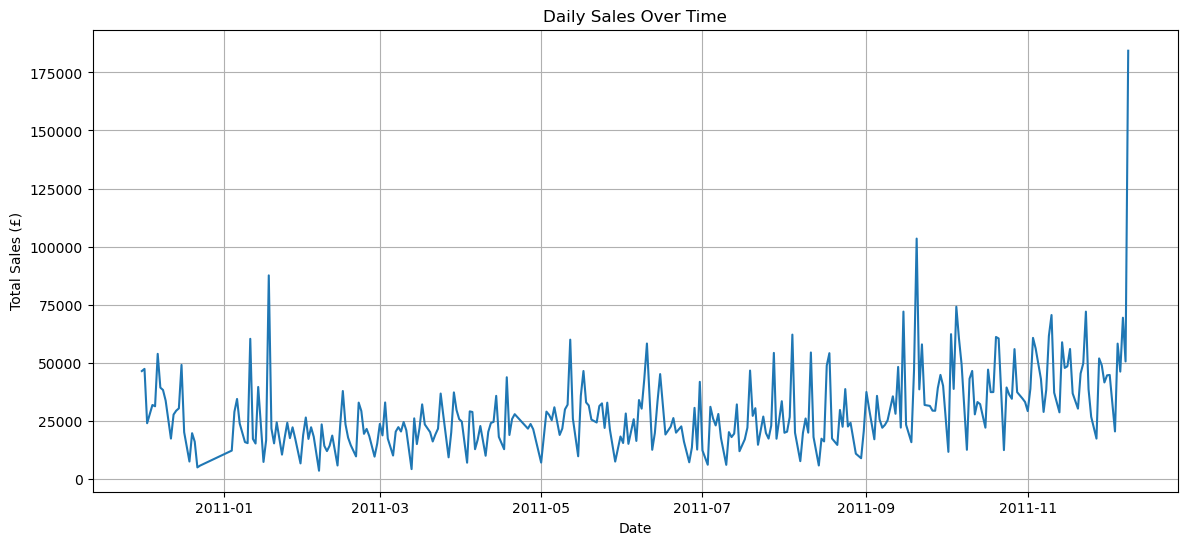

In [20]:
plt.figure(figsize=(14,6))
daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (£)")
plt.grid(True)
plt.show()


## Top 10 Countries by Sales

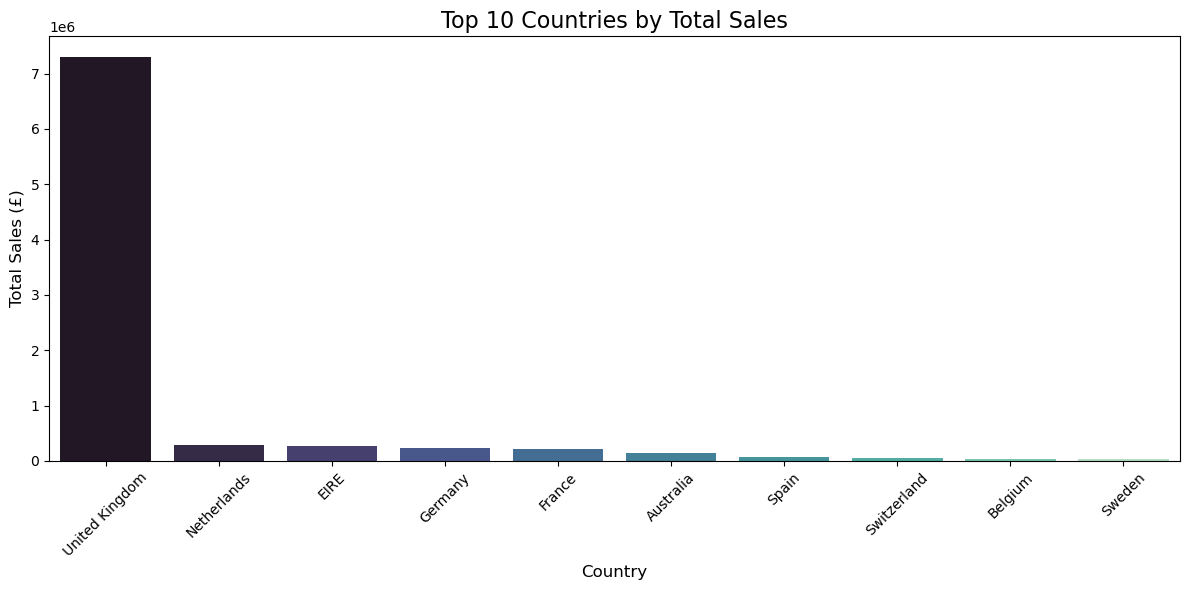

In [27]:
sales_by_country = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_countries_df = sales_by_country.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries_df, x='Country', y='TotalPrice', palette="mako")
plt.title("Top 10 Countries by Total Sales", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sales by Hour of the Day

C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


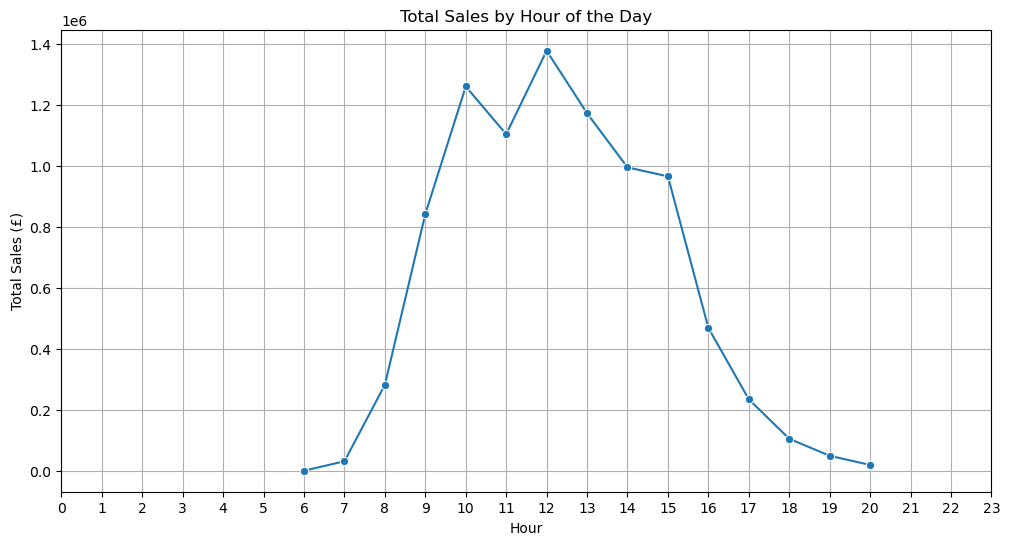

In [28]:
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
sales_by_hour = df_cleaned.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o')
plt.title("Total Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales (£)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

 ## Number of Orders per Customer

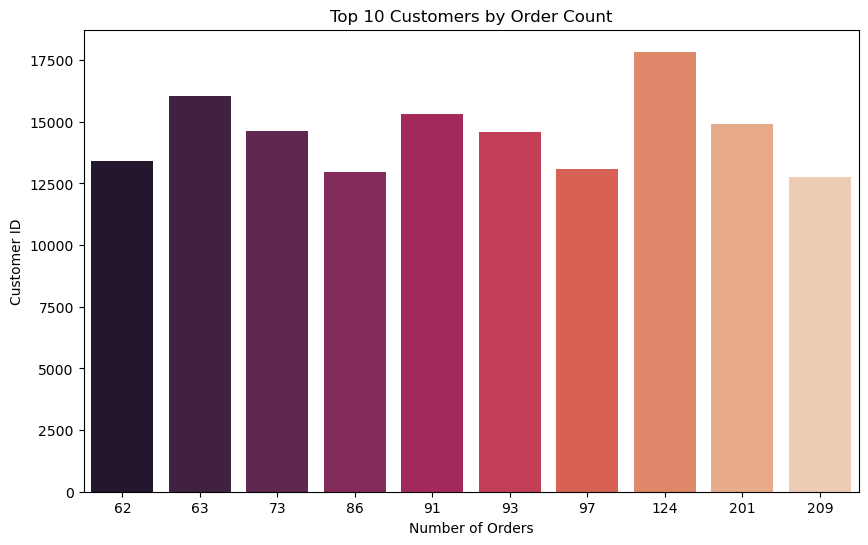

In [29]:
orders_per_customer = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_customer.values, y=orders_per_customer.index.astype(int), palette="rocket")
plt.title("Top 10 Customers by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.show()


 ## Most Returned Items

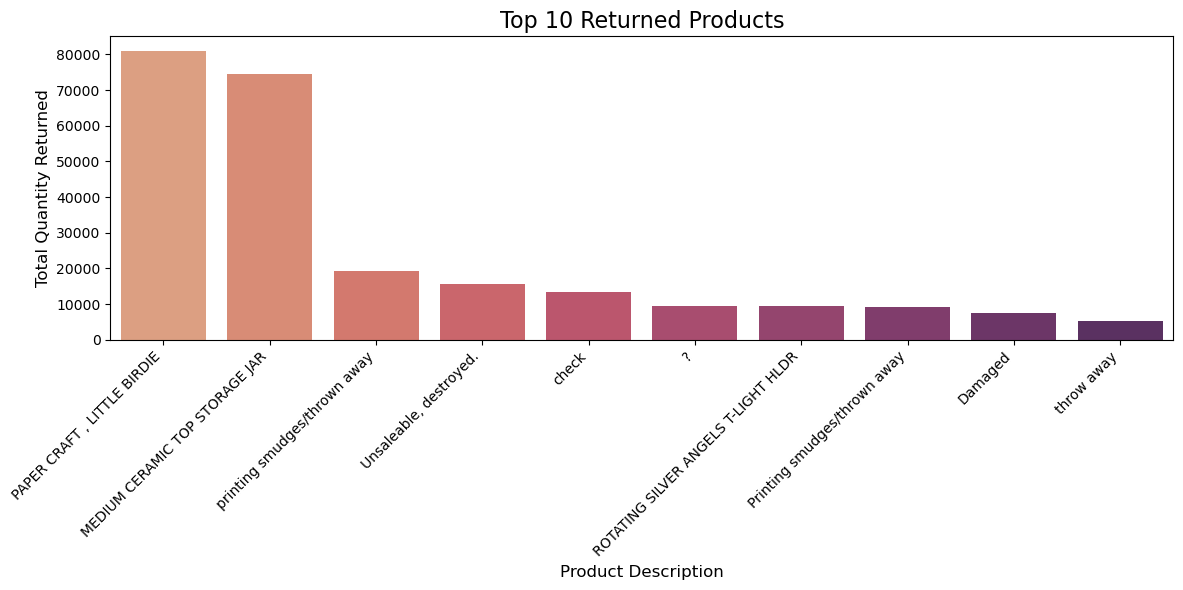

In [31]:
df_returns = df[df['Quantity'] < 0]
top_returns = df_returns.groupby('Description')['Quantity'].sum().sort_values().head(10)
top_returns_df = top_returns.abs().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_returns_df, x='Description', y='Quantity', palette="flare")
plt.title("Top 10 Returned Products", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Total Quantity Returned", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
